The two point function was convergent enough at cnt = 7


/media/store/Documentos/MyMasterThesis/NumericalAnalysis/pythonFiles/SchwingerDyson/ConformalTwoPointFunc.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  component = b * pow(np.pi / (beta * np.sin(k * 0.5)), 2 * delta)


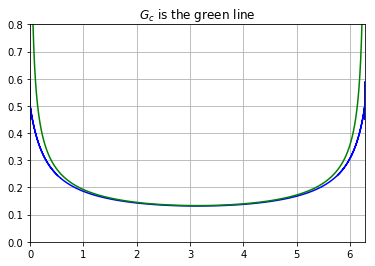

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dst
from sgnFunction import sgn
from ConformalTwoPointFunc import conformalTwoPointFunc


def discreteSineTransform(array, beta=1):
    result = dst(array, type=2)
    result = [-1j * k / beta for k in result]

    return result


def inverseDiscreteSineTransform(array, beta=1):
    # normalization factor
    f = 1.0 / (2 * len(array)) * beta

    result = dst(array, type=3)
    result = [1j * k * f for k in result]

    return result


def isConvergentEnough(previousArray, nextArray, epsilon=0.0001):
    array = [abs(nextArray[n] - previousArray[n]) ** 2 for n in range(len(previousArray))]
    return sum(array) < epsilon


def theta(numOfParticles):
    """
    The two point function has a period t ~ t + beta.
    Thus by transforming the variable of the function
    from time to theta defined below,
    the period changes from beta to 2pi.
    """
    return [np.pi * k / numOfParticles for k in range(numOfParticles + 1)]


def twoPointFunction(theta, beta=1, J=50, q=4, x=0.5):
    """
    return: two point function and self energy as dictionary
    theta = a coordinate of the two point function
    beta = the inverse of a temperature
    J = the scale of the random coupling tensor
    q = the number of the interacting particles
    x = the speed of convergence of the Fourier series of the two point function
    """

    # The initial two point function is the free one.
    result = [0.5 * k for k in sgn(theta)]
    transformedTwoPointFunction = inverseDiscreteSineTransform(result, beta)
    cnt = 0

    while True:
        previousTwoPointFunction = result[:]

        selfEnergy = [J * J * (k ** (q - 1)) for k in result]
        transformedSelfEnergy = inverseDiscreteSineTransform(selfEnergy, beta)

        nextTransformedTwoPointFunction = []
        for n in range(len(transformedSelfEnergy)):
            omega = 2 * np.pi * (n + 0.5) / beta
            term1 = x / (- 1j * omega - transformedSelfEnergy[n])
            term2 = (1 - x) * transformedTwoPointFunction[n]
            nextTransformedTwoPointFunction.append(term1 + term2)

        transformedTwoPointFunction = nextTransformedTwoPointFunction[:]
        result = discreteSineTransform(transformedTwoPointFunction)

        if isConvergentEnough(previousTwoPointFunction, result):
            print("The two point function was convergent enough at cnt = {}".format(cnt))
            break

        cnt += 1

    result = [k.real for k in result]

    return {"twoPointFunction": result, "selfEnergy": selfEnergy}




# ---------------------------------
# constant parameters of the system
# ---------------------------------
# Number of particles
numOfParticles = 2 ** 15
# The inverse of a temperature
beta = 1
# The scale of the random coupling tensor
J = 50
# the number of interacting particles
q = 4

# the real space
thetaValue = theta(numOfParticles)

result = twoPointFunction(thetaValue, beta, J, q=4, x=0.5)
result = result["twoPointFunction"]
result = list(result[:-1:]) + list(result[-1::-1])

thetaValue = [np.pi * k / numOfParticles for k in range(2 * numOfParticles + 1)]

plt.grid(True)
plt.plot(thetaValue, result, "b")
plt.plot(thetaValue, conformalTwoPointFunc(thetaValue, beta, J, q), "g")
plt.xlim(0, max(thetaValue))
plt.ylim(0, 0.8)
plt.title("$G_c$ is the green line")
plt.show()
